<a href="https://colab.research.google.com/github/fralfaro/MAT281_2023/blob/main/docs/labs/lab_08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# MAT281 - Laboratorio N°08



<a id='p1'></a>
## I.- Problema 01


<img src="https://drive.google.com/uc?export=view&id=1ZAicRye9Ixj7jijCwNhU8Fhf6Rmjp2Z7" width = "200" align="center"/>

El conjunto de datos se denomina `vehiculos_procesado_con_grupos.csv`, el cual contine algunas de las características más importante de un vehículo.

En este ejercicio se tiene como objetivo, es poder clasificar los distintos vehículos basados en las cracterísticas que se presentan a continuación. La dificultad de este ejercicio radíca en que ahora tenemos variables numéricas y variables categóricas.

Lo primero será cargar el conjunto de datos:

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.dummy import DummyClassifier
from sklearn.cluster import KMeans


%matplotlib inline
sns.set_palette("deep", desat=.6)
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [12]:
# cargar datos
df = pd.read_csv("https://raw.githubusercontent.com/fralfaro/MAT281_2022/main/labs/lab_08/data/vehiculos_procesado_con_grupos.csv", sep=",")\
       .drop(
            ["fabricante",
             "modelo",
             "transmision",
             "traccion",
             "clase",
             "combustible",
             "consumo"],

          axis=1)

df.head()

,year,desplazamiento,cilindros,co2,clase_tipo,traccion_tipo,transmision_tipo,combustible_tipo,tamano_motor_tipo,consumo_tipo,co2_tipo,consumo_litros_milla
0,1984,2.5,4.0,522.764706,Vehículos Especiales,dos,Automatica,Normal,pequeño,alto,alto,0.222671
1,1984,4.2,6.0,683.615385,Vehículos Especiales,dos,Automatica,Normal,grande,muy alto,muy alto,0.291185
2,1985,2.5,4.0,555.437500,Vehículos Especiales,dos,Automatica,Normal,pequeño,alto,alto,0.236588
3,1985,4.2,6.0,683.615385,Vehículos Especiales,dos,Automatica,Normal,grande,muy alto,muy alto,0.291185
4,1987,3.8,6.0,555.437500,Coches Medianos,dos,Automatica,Premium,grande,alto,alto,0.236588


En este caso, no solo se tienen datos numéricos, sino que también categóricos. Además, tenemos problemas de datos **vacíos (Nan)**. Así que para resolver este problema, seguiremos varios pasos:

### 1.- Normalizar datos

1. Cree un conjunto de datos con las variables numéricas, además, para cada dato vacía, rellene con el promedio asociado a esa columna. Finalmente, normalize los datos mediante el procesamiento **MinMaxScaler** de **sklearn**.

2.-  Cree un conjunto de datos con las variables categóricas , además, transforme de variables categoricas a numericas ocupando el comando **get_dummies** de pandas ([referencia](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html)). Explique a grande rasgo como se realiza la codificación de variables numéricas a categóricas.

3.- Junte ambos dataset en uno, llamado **df_procesado**.

In [8]:
df.dtypes #Vemos los tipo de datos de cada columna

year                      int64
desplazamiento          float64
cilindros               float64
co2                     float64
clase_tipo               object
traccion_tipo            object
transmision_tipo         object
combustible_tipo         object
tamano_motor_tipo        object
consumo_tipo             object
co2_tipo                 object
consumo_litros_milla    float64
dtype: object

In [27]:
#Quitamos los tipos que son object
df_num = df.drop(['clase_tipo', 'traccion_tipo','transmision_tipo','combustible_tipo','tamano_motor_tipo','consumo_tipo','co2_tipo'],axis=1)
df_num

,year,desplazamiento,cilindros,co2,consumo_litros_milla
0,1984,2.5,4.0,522.764706,0.222671
1,1984,4.2,6.0,683.615385,0.291185
2,1985,2.5,4.0,555.437500,0.236588
3,1985,4.2,6.0,683.615385,0.291185
4,1987,3.8,6.0,555.437500,0.236588
...,...,...,...,...,...
36786,2015,1.0,3.0,244.000000,0.105150
36787,2016,0.9,3.0,246.000000,0.108155
36788,2016,0.9,3.0,255.000000,0.111336
36789,2017,0.9,3.0,248.000000,0.108155


In [30]:
#Contamos los datos nulos
print('Year nulo:',df_num['year'].isnull().sum())
print('Desplazamiento nulo:',df_num['desplazamiento'].isnull().sum())
print('Cilindros nulo:',df_num['cilindros'].isnull().sum())
print('Co2 nulo:',df_num['co2'].isnull().sum())
print('Consumo litros nulo:',df_num['consumo_litros_milla'].isnull().sum())

Year nulo: 0
Desplazamiento nulo: 2
Cilindros nulo: 3
Co2 nulo: 0
Consumo litros nulo: 0


In [37]:
#Calculamos el promedio de la columna que tiene datos nulos, sin ellos y luego los reemplazamos con el promedio
df_num.fillna({'desplazamiento': df_num['desplazamiento'].mean(skipna = True)}, inplace=True)
df_num.fillna({'cilindros': df_num['cilindros'].mean(skipna = True)}, inplace=True)
df_num

,year,desplazamiento,cilindros,co2,consumo_litros_milla
0,1984,2.5,4.0,522.764706,0.222671
1,1984,4.2,6.0,683.615385,0.291185
2,1985,2.5,4.0,555.437500,0.236588
3,1985,4.2,6.0,683.615385,0.291185
4,1987,3.8,6.0,555.437500,0.236588
...,...,...,...,...,...
36786,2015,1.0,3.0,244.000000,0.105150
36787,2016,0.9,3.0,246.000000,0.108155
36788,2016,0.9,3.0,255.000000,0.111336
36789,2017,0.9,3.0,248.000000,0.108155


In [40]:
#Normalizamos los datos
colnum = ["desplazamiento", "cilindros", "co2", "consumo_litros_milla"]
df_num[colnum] = MinMaxScaler().fit_transform(df_num[colnum])
df_num.head()

,year,desplazamiento,cilindros,co2,consumo_litros_milla
0,1984,0.243590,0.142857,0.398014,0.331027
1,1984,0.461538,0.285714,0.527672,0.475113
2,1985,0.243590,0.142857,0.424351,0.360294
3,1985,0.461538,0.285714,0.527672,0.475113
4,1987,0.410256,0.285714,0.424351,0.360294


In [42]:
df_cat = df.drop(["year","desplazamiento","cilindros","co2","consumo_litros_milla"],axis=1)
df_cat.head()

,clase_tipo,traccion_tipo,transmision_tipo,combustible_tipo,tamano_motor_tipo,consumo_tipo,co2_tipo
0,Vehículos Especiales,dos,Automatica,Normal,pequeño,alto,alto
1,Vehículos Especiales,dos,Automatica,Normal,grande,muy alto,muy alto
2,Vehículos Especiales,dos,Automatica,Normal,pequeño,alto,alto
3,Vehículos Especiales,dos,Automatica,Normal,grande,muy alto,muy alto
4,Coches Medianos,dos,Automatica,Premium,grande,alto,alto


In [44]:
#2. get_dummies toma la informacion y si esta en la fila colaca un 1 y sino esat coloca un 0
df_cat_num=pd.get_dummies(df_cat)
df_cat_num.head()

,clase_tipo_Camionetas,clase_tipo_Coche Familiar,clase_tipo_Coches Grandes,clase_tipo_Coches Medianos,clase_tipo_Coches pequeños,clase_tipo_Deportivos,clase_tipo_Furgoneta,clase_tipo_Vehículos Especiales,traccion_tipo_cuatro,traccion_tipo_dos,...,consumo_tipo_alto,consumo_tipo_bajo,consumo_tipo_moderado,consumo_tipo_muy alto,consumo_tipo_muy bajo,co2_tipo_alto,co2_tipo_bajo,co2_tipo_moderado,co2_tipo_muy alto,co2_tipo_muy bajo
0,0,0,0,0,0,0,0,1,0,1,...,1,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,1,0,1,...,0,0,0,1,0,0,0,0,1,0
2,0,0,0,0,0,0,0,1,0,1,...,1,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,1,0,1,...,0,0,0,1,0,0,0,0,1,0
4,0,0,0,1,0,0,0,0,0,1,...,1,0,0,0,0,1,0,0,0,0


In [46]:
#3. Juntemos ambos df
df_procesado=pd.concat([df_num,df_cat_num],axis=1)
df_procesado.head()

,year,desplazamiento,cilindros,co2,consumo_litros_milla,clase_tipo_Camionetas,clase_tipo_Coche Familiar,clase_tipo_Coches Grandes,clase_tipo_Coches Medianos,clase_tipo_Coches pequeños,...,consumo_tipo_alto,consumo_tipo_bajo,consumo_tipo_moderado,consumo_tipo_muy alto,consumo_tipo_muy bajo,co2_tipo_alto,co2_tipo_bajo,co2_tipo_moderado,co2_tipo_muy alto,co2_tipo_muy bajo
0,1984,0.243590,0.142857,0.398014,0.331027,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
1,1984,0.461538,0.285714,0.527672,0.475113,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,1985,0.243590,0.142857,0.424351,0.360294,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
3,1985,0.461538,0.285714,0.527672,0.475113,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,1987,0.410256,0.285714,0.424351,0.360294,0,0,0,1,0,...,1,0,0,0,0,1,0,0,0,0


### 2.- Realizar ajuste mediante kmeans

Una vez depurado el conjunto de datos, es momento de aplicar el algoritmo de **kmeans**.

1. Ajuste el modelo de **kmeans** sobre el conjunto de datos, con un total de **8 clusters**.
2. Asociar a cada individuo el correspondiente cluster y calcular valor de los centroides de cada cluster.
3. Realizar un resumen de las principales cualidades de cada cluster. Para  esto debe calcular (para cluster) las siguientes medidas de resumen:
    * Valor promedio de las variables numérica
    * Moda para las variables numericas

In [49]:
#1. Ajustamos el modelo K-MEANS con lo visto en clase con 8 clusters
X = np.array(df_procesado)
kmeans = KMeans(n_clusters=8)
kmeans.fit(X)

#2. Asociamos y calculamos centroides

#centros
centroids = kmeans.cluster_centers_
#clusters
clusters = kmeans.labels_

#Etiquetar datos de los clusters encontrados
df_procesado["cluster"] = clusters
df_procesado["cluster"] = df_procesado["cluster"].astype('category')
centroids_df = pd.DataFrame(centroids)
centroids_df["cluster"] = [1,2,3,4,5,6,7,8]

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [50]:
#Describir los datos media
for i in range(0,8):
    print("Media Clusters", i+1)
    print(df_procesado[df_procesado['cluster']==i].drop(list(df_procesado.columns[5:],), axis=1).mean())
    print("")

Media Clusters 1
year                    1989.991781
desplazamiento             0.337698
cilindros                  0.252603
co2                        0.379437
consumo_litros_milla       0.308549
dtype: float64

Media Clusters 2
year                    2012.526959
desplazamiento             0.364051
cilindros                  0.279415
co2                        0.327427
consumo_litros_milla       0.253215
dtype: float64

Media Clusters 3
year                    2008.490389
desplazamiento             0.385044
cilindros                  0.294124
co2                        0.359855
consumo_litros_milla       0.288369
dtype: float64

Media Clusters 4
year                    1985.412470
desplazamiento             0.331892
cilindros                  0.244566
co2                        0.372419
consumo_litros_milla       0.297856
dtype: float64

Media Clusters 5
year                    2016.134736
desplazamiento             0.326767
cilindros                  0.258595
co2                    

In [51]:
#Describir los datos moda
for i in range(0,8):
    print("Media Clusters", i+1)
    print(df_procesado[df_procesado['cluster']==i].drop(list(df_procesado.columns[5:],), axis=1).mode())
    print("")

Media Clusters 1
   year  desplazamiento  cilindros       co2  consumo_litros_milla
0  1989         0.24359   0.142857  0.374603              0.305011

Media Clusters 2
   year  desplazamiento  cilindros       co2  consumo_litros_milla
0  2014        0.179487   0.142857  0.317749               0.24183

Media Clusters 3
   year  desplazamiento  cilindros       co2  consumo_litros_milla
0  2008        0.371795   0.285714  0.334805              0.260784

Media Clusters 4
   year  desplazamiento  cilindros       co2  consumo_litros_milla
0  1985        0.179487   0.142857  0.353657              0.281734

Media Clusters 5
   year  desplazamiento  cilindros       co2  consumo_litros_milla
0  2015        0.179487   0.142857  0.281322              0.281734

Media Clusters 6
   year  desplazamiento  cilindros       co2  consumo_litros_milla
0  2002        0.179487   0.285714  0.317749               0.24183

Media Clusters 7
   year  desplazamiento  cilindros       co2  consumo_litros_milla
0  1

### 3.- Elegir Número de cluster

Estime mediante la **regla del codo**, el número de cluster apropiados para el caso.
Para efectos prácticos, eliga la siguiente secuencia como número de clusters a comparar:

$$[5, 10, 20, 30, 50, 75, 100, 200, 300]$$

Una vez realizado el gráfico, saque sus propias conclusiones del caso.

In [53]:
#Implementamos la Regla del Codo como lo visto en clases
Nc = [5,10,20,30,50,75,100,200,300]
kmeans = [KMeans(n_clusters=i) for i in Nc]
score = [kmeans[i].fit(df_procesado).inertia_ for i in range(len(kmeans))]

df_Elbow = pd.DataFrame({'Number of Clusters':Nc,
                        'Score':score})
df_Elbow.head()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

,Number of Clusters,Score
0,5,368508.395037
1,10,200274.122881
2,20,167403.058387
3,30,150315.180678
4,50,125961.280863


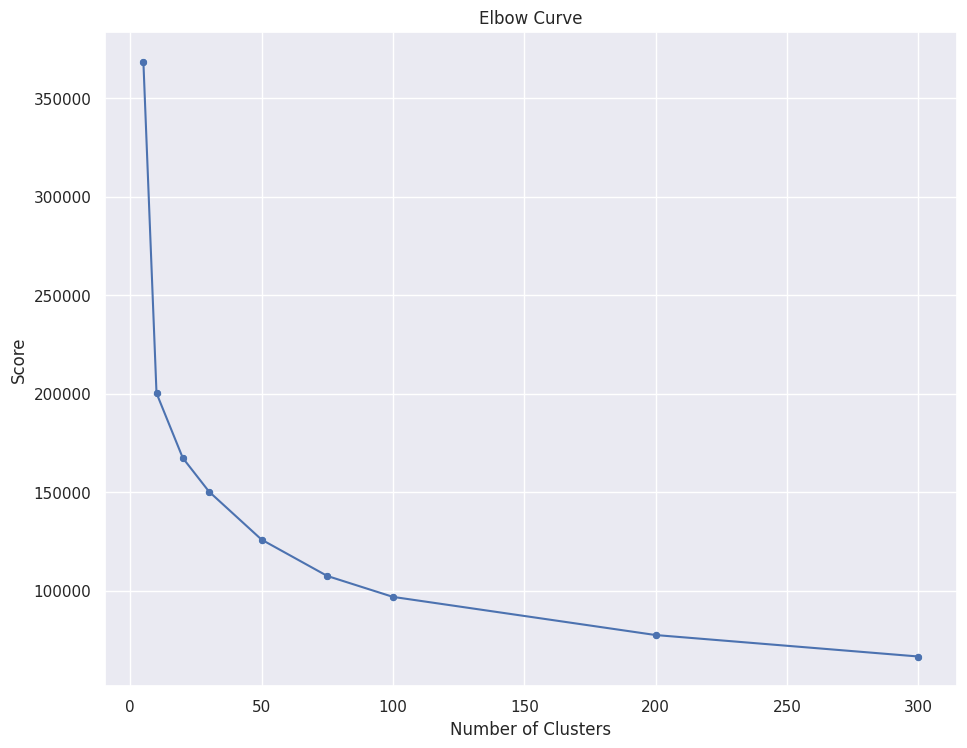

In [54]:
# graficamos los datos etiquetados con k-means
fig, ax = plt.subplots(figsize=(11, 8.5))
plt.title('Elbow Curve')
sns.lineplot(x="Number of Clusters",
             y="Score",
            data=df_Elbow)
sns.scatterplot(x="Number of Clusters",
             y="Score",
             data=df_Elbow)
plt.show()

Al observar el gráfico resultante, se pueden obtener conclusiones sobre el número apropiado de clusters. La regla del codo sugiere elegir el número de clusters donde la reducción en la inercia se estabiliza significativamente. En otras palabras, se busca el punto en el gráfico donde la curva de inercia comienza a aplanarse o forma un codo.

## II.- Problema 02

<img src="https://live.staticflickr.com/7866/47075467621_85ab810139_c.jpg" align="center"/>

Para el conjunto de datos de **Iris**, se pide realizar una reducción de dimensionalidad ocupando las técnicas de PCA y TSNE (vistas en clases).



In [55]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

In [56]:
dataset = load_iris()

features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
target = 'species'
iris = pd.DataFrame(
    dataset.data,
    columns=features)

iris['species'] = dataset.target
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


El objetivo es aplicar ambos algoritmos de la siguiente manera:

* Análisis detallado algoritma PCA (tablas, gráficos, etc.)
* Análisis detallado algoritma TSNE (tablas, gráficos, etc.)
* Comparar ambos algoritmos (conclusiones del caso)

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale

__Algoritmo PCA__

In [58]:

pca_pipe = make_pipeline(StandardScaler(), PCA())
pca_pipe.fit(iris)

# Se extrae el modelo entrenado del pipeline
modelo_pca = pca_pipe.named_steps['pca']

pd.DataFrame(
    data    = modelo_pca.components_,
    columns = iris.columns,
    index   = ['PC1', 'PC2', 'PC3', 'PC4','PC5']
)

,sepal_length,sepal_width,petal_length,petal_width,species
PC1,0.444863,-0.233369,0.506043,0.496894,0.494624
PC2,0.381980,0.920972,0.028717,0.070637,-0.009368
PC3,-0.750625,0.287249,-0.028337,0.385446,0.452414
PC4,-0.141201,-0.003513,0.243058,0.612583,-0.738725
PC5,0.269839,-0.121757,-0.826569,0.473583,0.069756


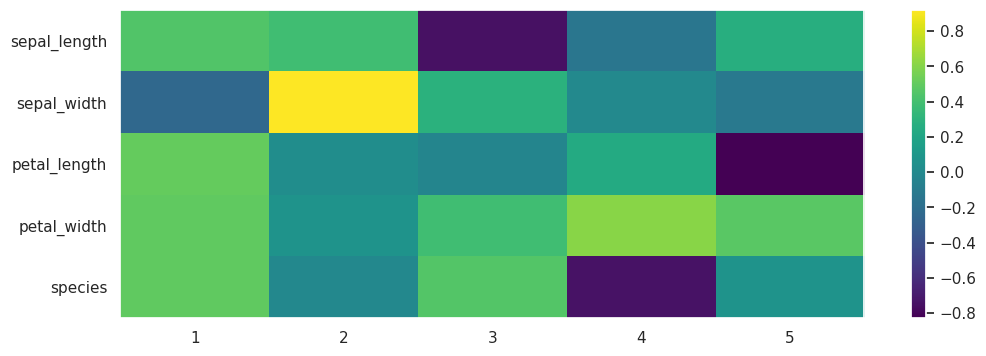

In [59]:
# Heatmap componentes
plt.figure(figsize=(12,4))
componentes = modelo_pca.components_
plt.imshow(componentes.T, cmap='viridis', aspect='auto')
plt.yticks(range(len(iris.columns)), iris.columns)
plt.xticks(range(len(iris.columns)), np.arange(modelo_pca.n_components_) + 1)
plt.grid(False)
plt.colorbar();

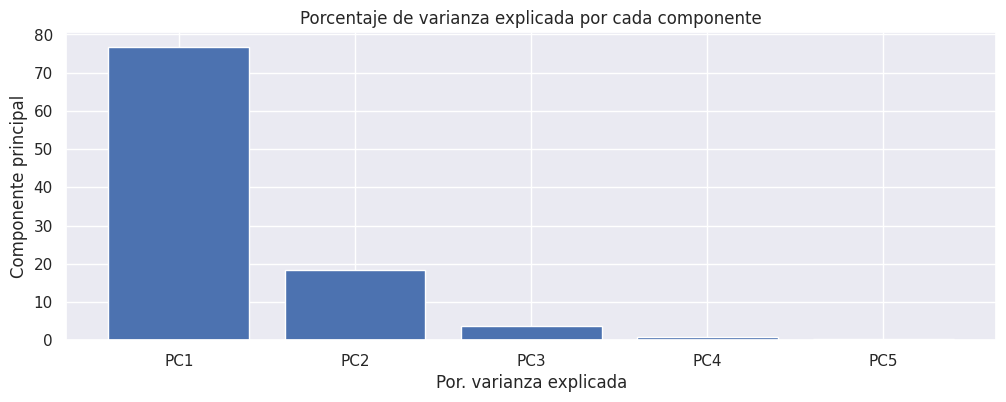

In [60]:
# graficar varianza por componente
percent_variance = np.round(modelo_pca.explained_variance_ratio_* 100, decimals =2)
columns = ['PC1', 'PC2', 'PC3', 'PC4','PC5']

plt.figure(figsize=(12,4))
plt.bar(x= range(1,6), height=percent_variance, tick_label=columns)
plt.xticks(np.arange(modelo_pca.n_components_) + 1)

plt.ylabel('Componente principal')
plt.xlabel('Por. varianza explicada')
plt.title('Porcentaje de varianza explicada por cada componente')
plt.show()

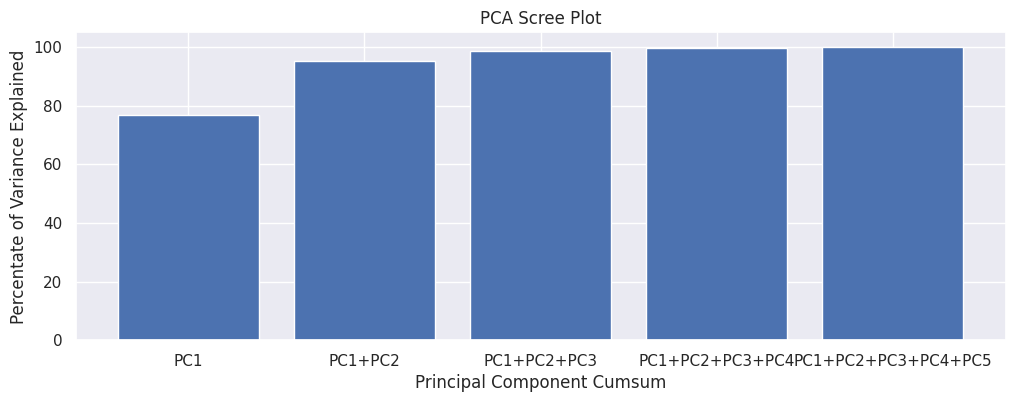

In [61]:
# graficar varianza por la suma acumulada de los componente
percent_variance_cum = np.cumsum(percent_variance)
columns = ['PC1', 'PC1+PC2', 'PC1+PC2+PC3', 'PC1+PC2+PC3+PC4','PC1+PC2+PC3+PC4+PC5']

plt.figure(figsize=(12,4))
plt.bar(x= range(1,6), height=percent_variance_cum, tick_label=columns)
plt.ylabel('Percentate of Variance Explained')
plt.xlabel('Principal Component Cumsum')
plt.title('PCA Scree Plot')
plt.show()

In [62]:
#Proyecciones de las observaciones del entrenamiento
proyecciones = pca_pipe.transform(X=iris)
proyecciones = pd.DataFrame(
    proyecciones,
    columns = ['PC1', 'PC2', 'PC3', 'PC4','PC5'],
    index   = iris.index
)
proyecciones.head()


,PC1,PC2,PC3,PC4,PC5
0,-2.576120,0.474499,-0.054364,-0.103224,0.032274
1,-2.415322,-0.678092,-0.203080,-0.064962,0.107023
2,-2.659333,-0.348282,0.112681,-0.046176,0.032555
3,-2.601991,-0.603306,0.134288,-0.000629,-0.066072
4,-2.683744,0.640220,0.102711,-0.086924,-0.028450


In [72]:
#Reconstrucción de las proyecciones
recostruccion = pca_pipe.inverse_transform(proyecciones)
recostruccion = pd.DataFrame(
                    recostruccion,
                    columns = iris.columns,
                    index   = iris.index
)
print('Valores originales \n')
display(recostruccion.head())


print('\n Valores reconstruidos \n')
display(iris.head())

Valores originales 



,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,2.220446e-16
1,4.9,3.0,1.4,0.2,1.110223e-16
2,4.7,3.2,1.3,0.2,-2.220446e-16
3,4.6,3.1,1.5,0.2,2.220446e-16
4,5.0,3.6,1.4,0.2,0.000000e+00



 Valores reconstruidos 



,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [64]:
#PLOT PCA
scaler = StandardScaler()

X = iris.drop(columns='species')
y = iris['species']

embedding = PCA(n_components=2)
X_transform = embedding.fit_transform(X)

df_pca = pd.DataFrame(X_transform,columns = ['Score1','Score2'])
df_pca['species'] = y

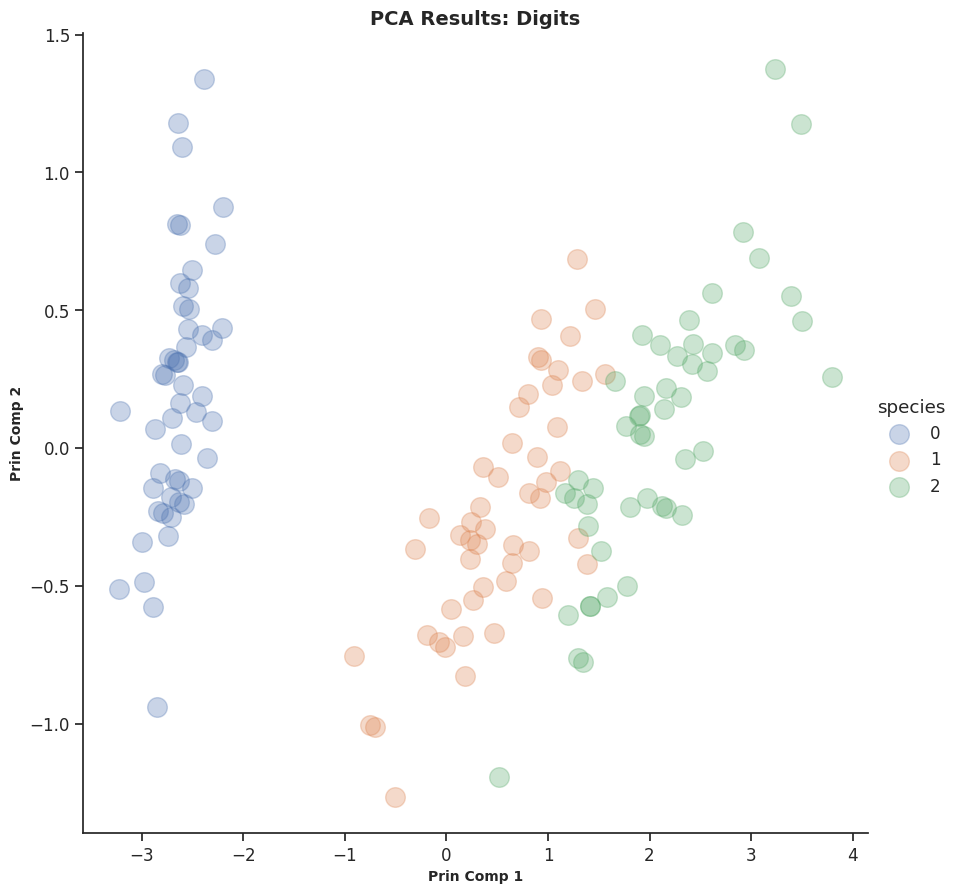

In [65]:
# Set style of scatterplot
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")

# Create scatterplot of dataframe
sns.lmplot(x='Score1',
           y='Score2',
           data=df_pca,
           fit_reg=False,
           legend=True,
           height=9,
           hue='species',
           scatter_kws={"s":200, "alpha":0.3})

plt.title('PCA Results: Digits', weight='bold').set_fontsize('14')
plt.xlabel('Prin Comp 1', weight='bold').set_fontsize('10')
plt.ylabel('Prin Comp 2', weight='bold').set_fontsize('10')

__Algoritmo TSNE__

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from time import time
%matplotlib inline
from sklearn.datasets import load_digits
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

In [73]:
scaler = StandardScaler()

X = iris.drop(columns='species')
y = iris['species']

embedding = TSNE(n_components=2)
X_transform = embedding.fit_transform(X)

df_tsne = pd.DataFrame(X_transform,columns = ['_DIM_1_','_DIM_2_'])
df_tsne['species'] = y

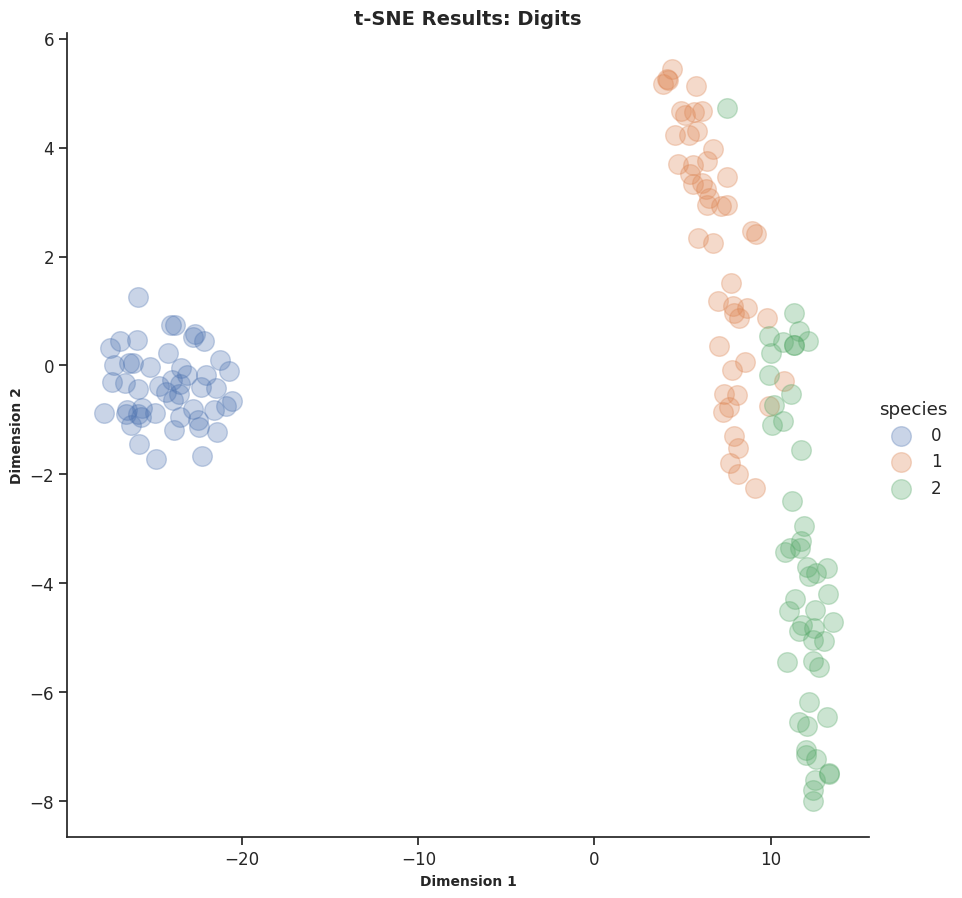

In [74]:
#PLOT TSNE
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")

sns.lmplot(x='_DIM_1_',
           y='_DIM_2_',
           data=df_tsne,
           fit_reg=False,
           legend=True,
           height=9,
           hue='species',
           scatter_kws={"s":200, "alpha":0.3})

plt.title('t-SNE Results: Digits', weight='bold').set_fontsize('14')
plt.xlabel('Dimension 1', weight='bold').set_fontsize('10')
plt.ylabel('Dimension 2', weight='bold').set_fontsize('10')